In [1]:
#--------------VISCOUS FLUID---------- SPHERICAL PARTICLE--------VARIABLE TIME---------
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
fig = plt.figure() 

In [2]:
x_arr = np.loadtxt('age 20.txt')                                      #all elements are in micron
y_arr = np.loadtxt('age 21.txt')                                       #all elements are in micron
t_arr = np.loadtxt('age 22.txt') 

In [3]:
len(x_arr) 

27332

In [4]:
'''import pandas as pd
df = pd.DataFrame(t_arr)'''

'import pandas as pd\ndf = pd.DataFrame(t_arr)'

In [5]:
'''df'''

'df'

In [6]:
'''pd.DataFrame.describe(df)'''

'pd.DataFrame.describe(df)'

In [7]:
'''pd.DataFrame.hist(df,bins=50)'''

'pd.DataFrame.hist(df,bins=50)'

In [4]:
dt_min=1e-4                                                                 #initial time step
dt_max=1e8                                                                 #final time step in msd graph
msd_xarr=[]                                                                    #mean squared x
msd_yarr=[]                                                                    #mean squared y
msd_rarr=[]                                                                    #r is the msd array
mean_t_arr=[]                                                                  #dtarray for msd plot

N = 30
timelaglog= np.logspace( np.log10(dt_min), np.log10(dt_max), num=N ) #nonzero points for msd plot(distributed linearly in log scale)
counterarray=[]                                                                 #no of data averaging for particular dt'''

In [5]:
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')

for m in range(0,len(timelaglog)-1):
    print(m)
    r=0 
    x=0
    y=0 
    count=0                                                                   #counter no of elements for data avraging for particular dt
    for i in range(len(t_arr)):
        for j in range(i+1,len(t_arr)):
            timelag = t_arr[j]-t_arr[i]                                       #time difference between i'th and j'th elements
            if timelag >= timelaglog[m]:
                if timelag <= timelaglog[m+1]:
                    count = count+1
                    x = x+((x_arr[j]-x_arr[i])**2)
                    y = y+((y_arr[j]-y_arr[i])**2)
                else:
                    break;
            else:
                break;
            
    print('no. of  points',count) 
    x=float(x/count)
    y=float(y/count)
    r=float(x+y) 
    msd_xarr.append(x)
    msd_yarr.append(y)                                                          #msd for a particual dt
    msd_rarr.append(r)
    mean_t_arr.append(np.sqrt(timelaglog[m]*timelaglog[m+1]))
    print( 'tau=', np.sqrt(timelaglog[m]*timelaglog[m+1]) )
    counterarray.append(count)
    
time2=datetime.now().strftime('%Y-%m-%d %H:%M:%S') # final time ending of the run time
print(time1)
print(time2) 

0
no. of  points 963
tau= 0.0001610262027560939
1
no. of  points 1012
tau= 0.00041753189365604
2
no. of  points 1005
tau= 0.001082636733874054
3
no. of  points 1012
tau= 0.002807216203941176
4
no. of  points 1123
tau= 0.00727895384398315
5
no. of  points 1197
tau= 0.018873918221350976
6
no. of  points 1209
tau= 0.048939009184774944
7
no. of  points 1189
tau= 0.12689610031679222
8
no. of  points 1259
tau= 0.32903445623126676
9
no. of  points 1301
tau= 0.853167852417281
10
no. of  points 1427
tau= 2.21221629107045
11
no. of  points 1504
tau= 5.736152510448681
12
no. of  points 1547
tau= 14.873521072935118
13
no. of  points 1615
tau= 38.56620421163472
14
no. of  points 1837
tau= 100.00000000000001
15
no. of  points 1919
tau= 259.29437974046675
16
no. of  points 1938
tau= 672.3357536499335
17
no. of  points 2151
tau= 1743.3288221999871
18
no. of  points 2306
tau= 4520.35365636024
19
no. of  points 2684
tau= 11721.022975334805
20
no. of  points 2823
tau= 30391.95382313201
21
no. of  points 

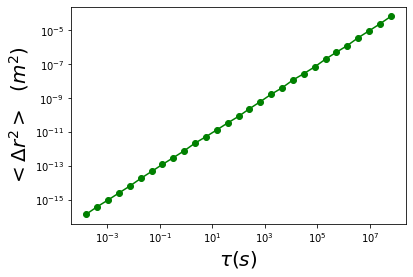

In [6]:
plt.plot(mean_t_arr,msd_rarr,'go-')

plt.ylabel(r'$<\Delta r^2> \ \  (m^2)$',size=20)
plt.xlabel(r'$\tau  (s)$',size=20)

plt.xscale('log')
plt.yscale('log')
#plt.savefig('viscous_long.png')

plt.show()

In [14]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(np.log10(t_step), np.log10(msd_x_arr))

/Users/manishkumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/manishkumar/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [15]:
slope

nan

In [11]:
'''plt.plot(mean_t_arr,msd_xarr,'bo-')
plt.plot(mean_t_arr,msd_yarr,'ro-')
plt.ylabel(r'$<\Delta x^2>,<\Delta y^2> \ \  (m^2)$',size=15)
plt.xlabel(r'$\tau  (s)$',size=20)

plt.xscale('log')
plt.yscale('log')
#plt.savefig('viscous_x_y_long.png')

plt.show()

'''

"plt.plot(mean_t_arr,msd_xarr,'bo-')\nplt.plot(mean_t_arr,msd_yarr,'ro-')\nplt.ylabel(r'$<\\Delta x^2>,<\\Delta y^2> \\ \\  (m^2)$',size=15)\nplt.xlabel(r'$\tau  (s)$',size=20)\n\nplt.xscale('log')\nplt.yscale('log')\n#plt.savefig('viscous_x_y_long.png')\n\nplt.show()\n\n"

In [12]:
'''np.savetxt('msd_x_viscous.txt',msd_xarr)
np.savetxt('msd_y_viscous.txt',msd_yarr)
np.savetxt('msd_r_viscous.txt',msd_rarr)
np.savetxt('t_arr_viscous.txt',mean_t_arr)
np.savetxt('counterarray_viscous.txt',counterarray)'''

"np.savetxt('msd_x_viscous.txt',msd_xarr)\nnp.savetxt('msd_y_viscous.txt',msd_yarr)\nnp.savetxt('msd_r_viscous.txt',msd_rarr)\nnp.savetxt('t_arr_viscous.txt',mean_t_arr)\nnp.savetxt('counterarray_viscous.txt',counterarray)"

In [13]:
'''import numpy
a = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])
index = ['time', 'msd_r', 'msd_x', 'msd_y']

import pandas as pd
df_a = pd.DataFrame(a, index)
df_a_tp = pd.DataFrame.transpose(df_a)

numpy.savetxt("viscous_long.csv", df_a_tp, delimiter=",")'''

'import numpy\na = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])\nindex = [\'time\', \'msd_r\', \'msd_x\', \'msd_y\']\n\nimport pandas as pd\ndf_a = pd.DataFrame(a, index)\ndf_a_tp = pd.DataFrame.transpose(df_a)\n\nnumpy.savetxt("viscous_long.csv", df_a_tp, delimiter=",")'